In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, nsolve, latex
from sympy.utilities.lambdify import lambdify
from scipy.spatial.transform import Rotation as R
from scipy.integrate import trapezoid
from skspatial.measurement import area_signed


sys.path.append('../model/')
from area import Model

In [2]:
np.seterr(invalid='ignore') # Ignore sqrt(nan)

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
m = Model(theta=15, x0=2.0, y0=0.0, z0=10.0, r=2.2, i=7.4, mask_z=False)  # Grazing
m2 = Model(theta=15, x0=2.0, y0=0.0, z0=10.0, r=2.2, i=7.4, mask_z=True)  # Grazing
#m2 = Model(theta=7.5, x0=3.0, y0=0.0, z0=10.0, r=2.2, i=7.4, mask_z=True)  # Grazing
m3 = Model(theta=15, x0=0.1, y0=0.0, z0=10.0, r=2.2, i=10.0, mask_z=True) # Full intersection
m4 = Model(theta=15, x0=0.1, y0=0.0, z0=10.0, r=0.2, i=12, mask_z=True)    # Inside Cone
m5 = Model(theta=15, x0=15, y0=15, z0=3, r=1.0, i =10, mask_z=True)       # Outside cone
models = [m, m2, m3, m4, m5]

n_idx=2 one segment, grazing?


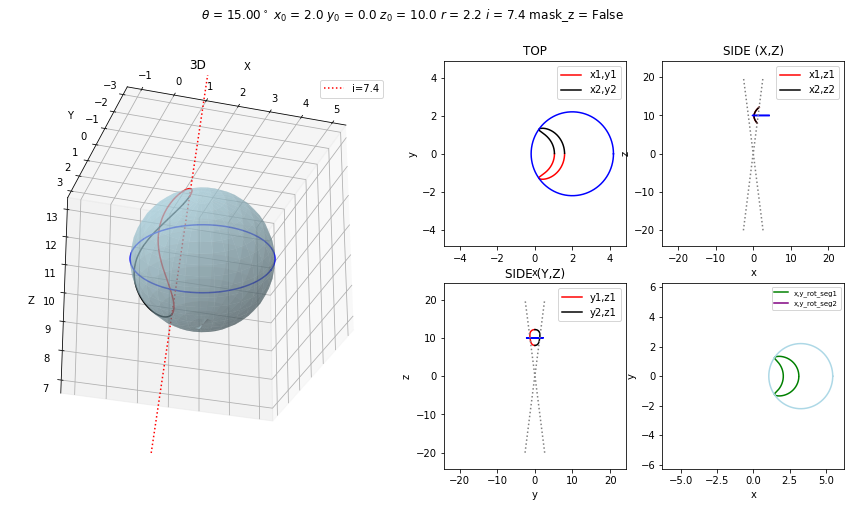

In [4]:
m.run()
m.plot()

n_idx=1 WARNING! n_idx == 1 curve may be outside of zrange... (if mask_z=False)


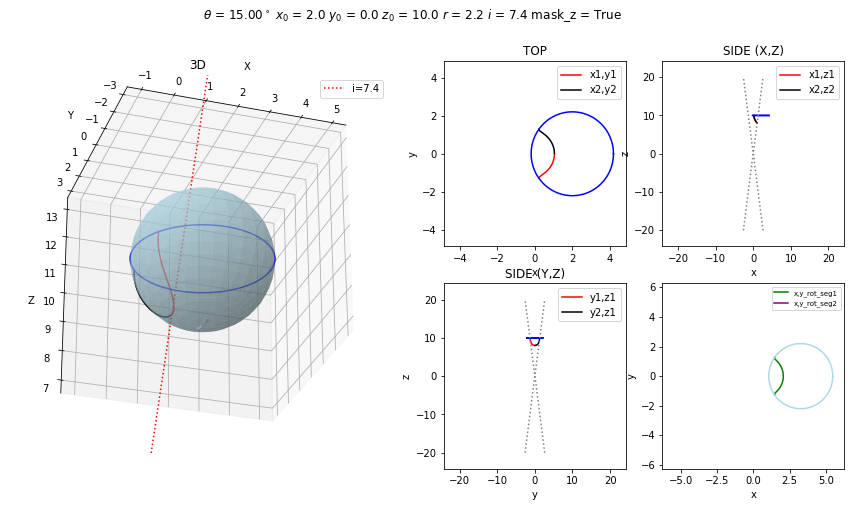

In [5]:
m2.run()
m2.plot()

In [6]:
# Joining Grazing Angles

In [7]:
# Join x1 and x2
x_seg1 = np.concatenate([np.flip(m2.x1_seg1), m2.x2_seg1])
y_seg1 = np.concatenate([np.flip(m2.y1_seg1), m2.y2_seg1])

# Find endpoints
x_seg1_start, x_seg1_end  = x_seg1[0], x_seg1[-1]
y_seg1_start, y_seg1_end = y_seg1[0], y_seg1[-1]

In [8]:
# Get the length from the start to the end point
chord_length = (x_seg1_start - x_seg1_end)**2 + (y_seg1_start-y_seg1_end)**2

In [9]:
# Calculate the distance of each point on the circle to the start and end points
point_distances_start = np.sum(np.array([m2.x_circ - x_seg1_start, m2.y_circ - y_seg1_start])**2, axis=0)
point_distances_end   = np.sum(np.array([m2.x_circ - x_seg1_end, m2.y_circ - y_seg1_end])**2, axis=0)

In [10]:
# Get the idxs of the points on the circle that are closer distance from the start and ends
path_idx = ((point_distances_end < chord_length) & (point_distances_start < chord_length))

In [11]:
# Get the segment of the circle that satisfies the above condition
x_circ_segment = m2.x_circ[path_idx]
y_circ_segment = m2.y_circ[path_idx]

In [12]:
# Join the circle segment with the intersection segment to create the closed lens
x_lens = np.concatenate([x_seg1, x_circ_segment])
y_lens = np.concatenate([y_seg1, y_circ_segment])

In [13]:
# Calculate the area of the Lens
area_signed(np.array([x_lens,y_lens]).T)

2.1515824359304423

(-5.0, 5.0)

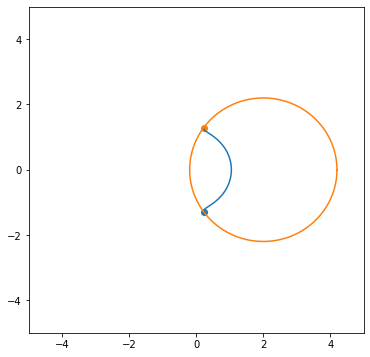

In [14]:
plt.figure(figsize=(6,6))
plt.plot(x_seg1, y_seg1)
plt.plot(m2.x_circ, m2.y_circ)
plt.scatter(x_seg1_start, y_seg1_start)
plt.scatter(x_seg1_end, y_seg1_end)

plt.xlim(-5,5)
plt.ylim(-5,5)

(-5.0, 5.0)

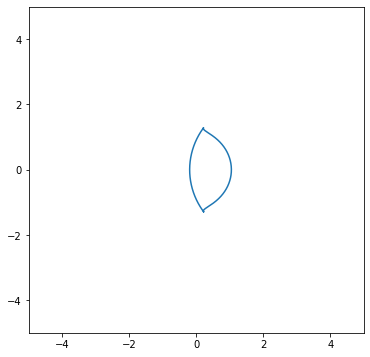

In [15]:
plt.figure(figsize=(6,6))
plt.plot(x_lens,y_lens)
plt.xlim(-5,5)
plt.ylim(-5,5)

n_idx=2 one segment, grazing?


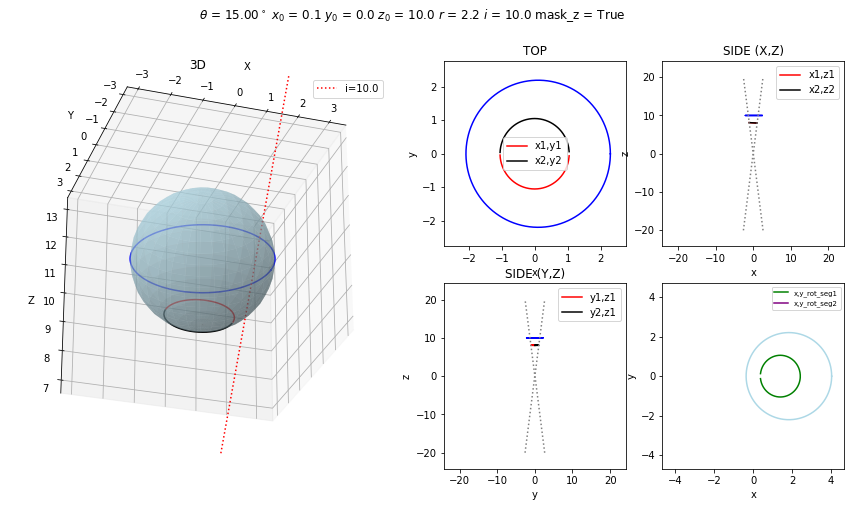

In [16]:
m3.run()
m3.plot()

In [17]:
m3.x1_seg1

array([ 1.0442,  1.0368,  1.0294, ..., -1.0399, -1.0468, -1.0537])

In [18]:
x_seg1 = np.concatenate([np.flip(m3.x1_seg1), m3.x2_seg1])
y_seg1 = np.concatenate([np.flip(m3.y1_seg1), m3.y2_seg1])

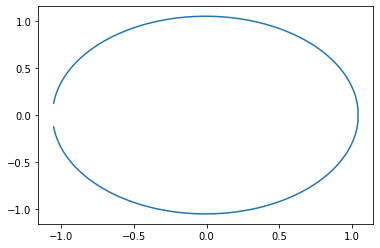

In [19]:
plt.plot(x_seg1, y_seg1)